In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Importing the modules
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
help(untar_data)
# used for downloading and unziping data sources from the INTERNET. 

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [6]:
 # Lets get the data
path = untar_data(URLs.PETS)

In [7]:
# list items in path
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
# Get filenames
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_123.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_91.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_21.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_128.jpg')]

In [10]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [0]:
# Read data using Regular expressions using ImageDataBunch.from_name_re functionality
bs=64
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

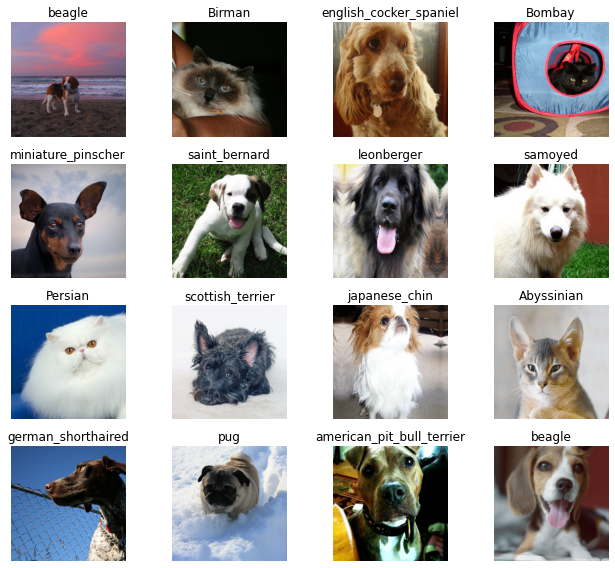

In [15]:
# using build in functions to display images from a batch
data.show_batch(rows=4, figsize=(9,8))

In [17]:
# to get classes from ImageDataBunch Object
print(data.classes)
print(data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


In [0]:
# Training resnet34 , TRANSFER LEARNING :O 

In [19]:
help(error_rate)

Help on function error_rate in module fastai.metrics:

error_rate(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f0bef03dd90>
    1 - `accuracy`



In [21]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7f0b9be7dea0>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [24]:
# lets fit the model
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.353565,0.298326,0.104195,01:30
1,0.597038,0.253959,0.081191,01:29
2,0.382061,0.224369,0.072395,01:28
3,0.285083,0.213011,0.072395,01:28


In [0]:
learn.save('stage-1')

In [26]:
# to see what comes out :: 
interp = ClassificationInterpretation.from_learner(learn)

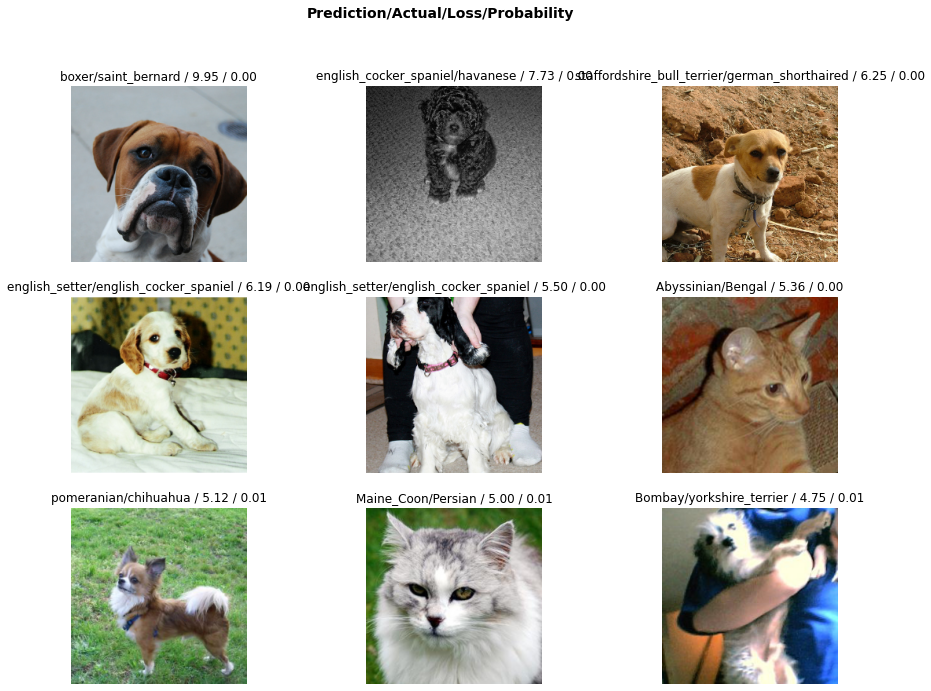

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

In [30]:
doc(interp.plot_top_losses)

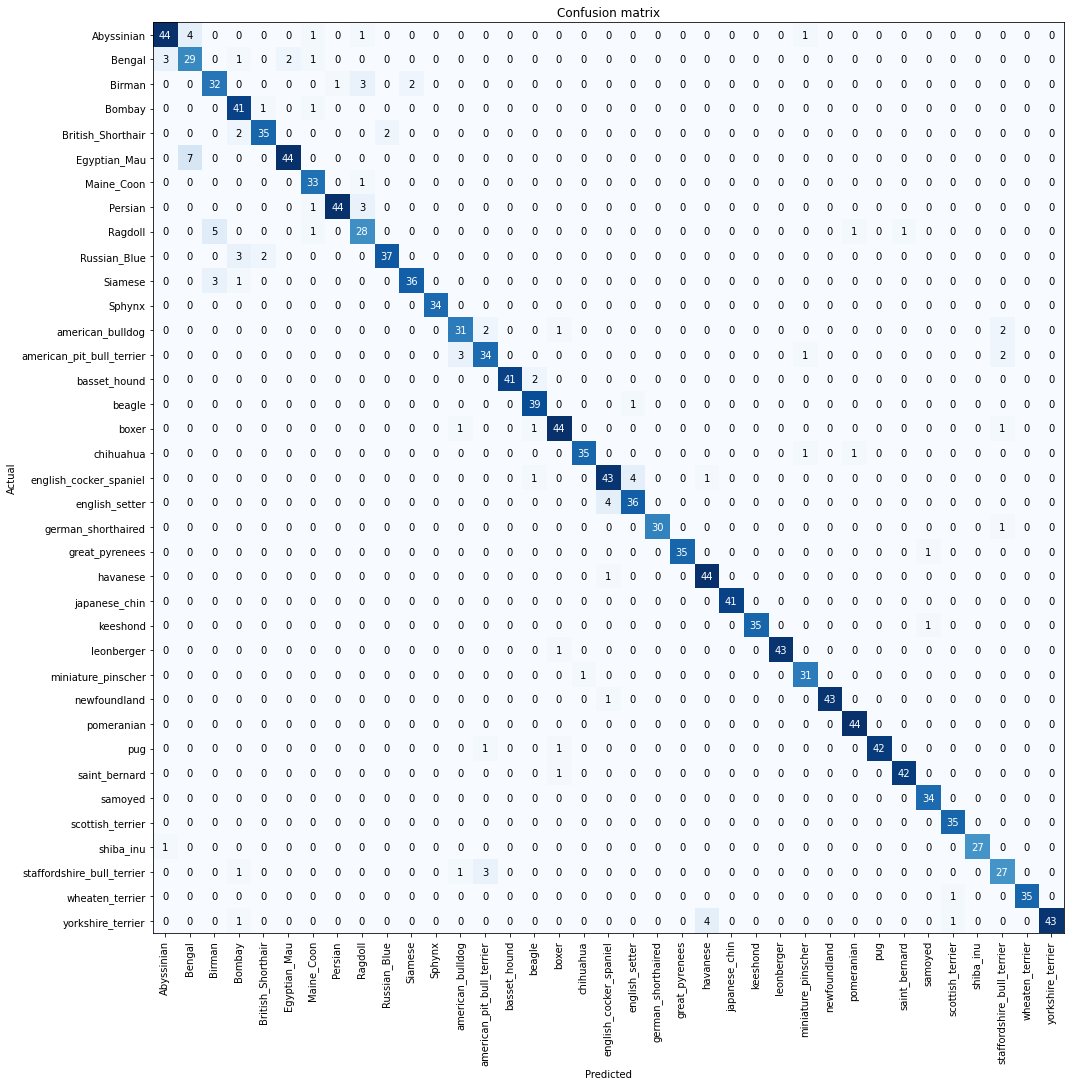

In [32]:
interp.plot_confusion_matrix(figsize=(15,15))

In [33]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 7),
 ('Ragdoll', 'Birman', 5),
 ('Abyssinian', 'Bengal', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('Persian', 'Ragdoll', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2)]

Fine tuning

In [0]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.712016,0.361273,0.119756,01:31


In [36]:
# it didnt get better, as it is unlikey to make it better than the feature detection it learned when it was trained on imagenet
# so lets revert back
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,beagle,Ragdoll,Siamese,staffordshire_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,havanese,english_cocker_spaniel,keeshond,Egyptian_Mau
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3

# finding the optimal learning rate 
---

In [37]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


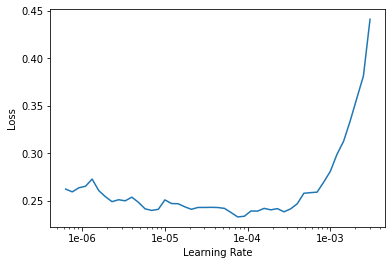

In [38]:
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.269661,0.197144,0.066306,01:30
1,0.229366,0.193771,0.066306,01:29


--- 
## Lets try resnet50

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


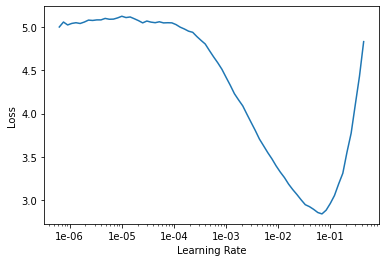

In [49]:
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.687380,0.317328,0.103518,02:13
1,0.492760,0.250241,0.071719,02:14
2,0.365788,0.239310,0.072395,02:14
3,0.224438,0.186752,0.062246,02:15
4,0.158901,0.180259,0.053451,02:17


---
# To load data from ImageData format in FastAI API

- path = dir
- tfms = get_transforms()
- data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=28, bs=64)
- #then to view data.showbatch(rows=5, figsize=(5,5))

In [0]:
# You can find other methods from the docs function or github rep docs source folder